In [1]:
!pip3 install scipy

In [2]:
!pip3 install researchpy

In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

https://www.kaggle.com/lakshmi25npathi/bike-sharing-dataset

In [4]:
bike_sharing_data = pd.read_csv('day.csv')

bike_sharing_data.shape

(731, 16)

In [5]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
bike_sharing_data = bike_sharing_data[['season', 
                                       'mnth', 
                                       'holiday', 
                                       'workingday', 
                                       'weathersit', 
                                       'temp',
                                       'cnt']]

In [7]:
bike_sharing_data.to_csv('bike_sharing_data_processed.csv', index=False)

In [8]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [9]:
bike_sharing_data['season'].unique()

array([1, 2, 3, 4])

In [10]:
bike_sharing_data['workingday'].unique()

array([0, 1])

In [11]:
bike_sharing_data['holiday'].unique()

array([0, 1])

In [12]:
bike_sharing_data['weathersit'].unique()

array([2, 1, 3])

In [13]:
bike_sharing_data['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [14]:
bike_sharing_data.shape

(731, 7)

In [15]:
bike_sharing_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


<AxesSubplot:title={'center':'cnt'}, xlabel='workingday'>

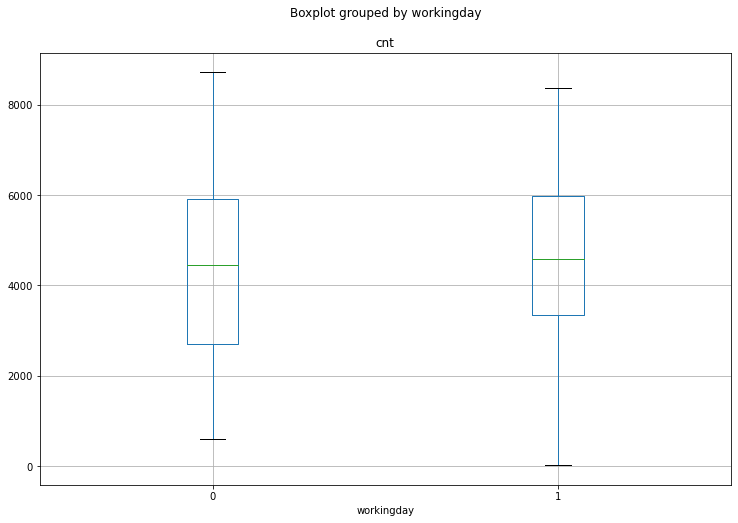

In [16]:
bike_sharing_data.boxplot(column=['cnt'], by='workingday', figsize=(12, 8))

In [17]:
sample_01 = bike_sharing_data[(bike_sharing_data['workingday'] == 1)]

sample_02 = bike_sharing_data[(bike_sharing_data['workingday'] == 0)]

In [18]:
sample_01.shape, sample_02.shape

((500, 7), (231, 7))

In [19]:
sample_01 = sample_01.sample(231)

sample_01.shape, sample_02.shape

((231, 7), (231, 7))

## The hypothesis being tested

* __Null hypothesis (H0): u1 = u2, which translates to the mean of `sample_01` is equal to the mean of `sample 02`__
* __Alternative hypothesis (H1): u1 ? u2, which translates to the means of `sample01` is not equal to `sample 02`__

### Homogeneity of variance
Of these tests, the most common assessment for homogeneity of variance is Levene's test. The Levene's test uses an F-test to test the null hypothesis that the variance is equal across groups. A p value less than .05 indicates a violation of the assumption.

https://en.wikipedia.org/wiki/Levene%27s_test

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html

To know, [Click here](https://en.wikipedia.org/wiki/Levene%27s_test) why we test for levene's test?

In [20]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=2.425840587890354, pvalue=0.12003690763557492)

## Normal distribution  of residuals

### Checking difference between two pair points

https://pythonfordatascience.org/independent-t-test-python/

(array([10., 12., 21., 40., 33., 35., 31., 31., 12.,  6.]),
 array([-2.22314272, -1.77566717, -1.32819162, -0.88071607, -0.43324052,
         0.01423503,  0.46171058,  0.90918613,  1.35666168,  1.80413723,
         2.25161278]),
 <BarContainer object of 10 artists>)

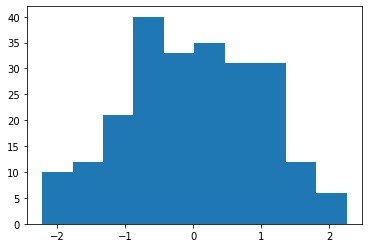

In [29]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt'], dtype=np.float64))

plt.hist(diff)

### Checking for normality by Q-Q plot graph

https://www.statisticshowto.datasciencecentral.com/assumption-of-normality-test/

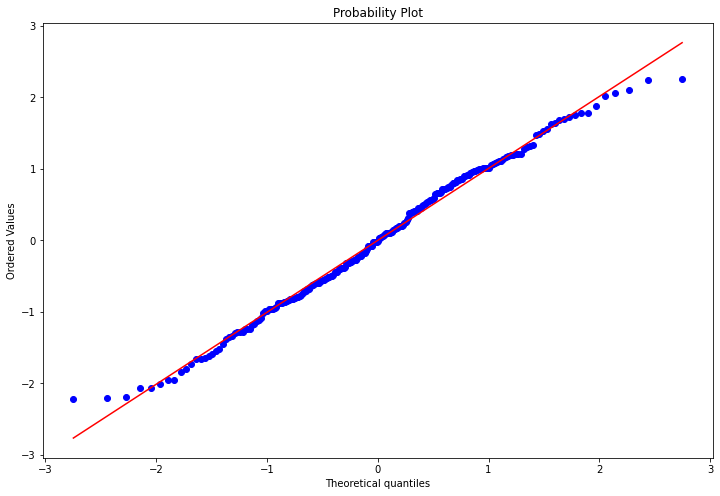

In [30]:
plt.figure(figsize=(12, 8))

stats.probplot(diff, plot=plt, dist='norm')

plt.show()

### Checking normal distribution by `shapiro method`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://stats.stackexchange.com/questions/15696/interpretation-of-shapiro-wilk-test

In [31]:
stats.shapiro(diff)

ShapiroResult(statistic=0.9903466701507568, pvalue=0.1277574598789215)

__Note:-__[See here](https://stats.stackexchange.com/questions/15696/interpretation-of-shapiro-wilk-test)

W test statistic and the second value is the p-value. Since the test statistic does not produce a significant p-value, the data is indicated to be normally distributed

The data met all the assumptions for the t-test which indicates the results can be trusted and the t-test is an appropriate test to be used.

### Independent t-test by using `scipy.stats`

In [32]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=2.223755623917218, pvalue=0.02664976774301509)

### Independent t-test using `researchpy`

https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

In [33]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'])

In [34]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4739.709957,1903.577225,125.246186,4492.933417,4986.486497
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4534.939394,1987.704505,92.476383,4353.211907,4716.666881


In [35]:
print(results)

          Independent t-test   results
0  Difference (cnt - cnt) =   409.5411
1      Degrees of freedom =   460.0000
2                       t =     2.2238
3   Two side test p value =     0.0266
4  Difference < 0 p value =     0.9867
5  Difference > 0 p value =     0.0133
6               Cohen's d =     0.2069
7               Hedge's g =     0.2066
8           Glass's delta =     0.2151
9             Pearson's r =     0.1031


In [36]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


<AxesSubplot:>

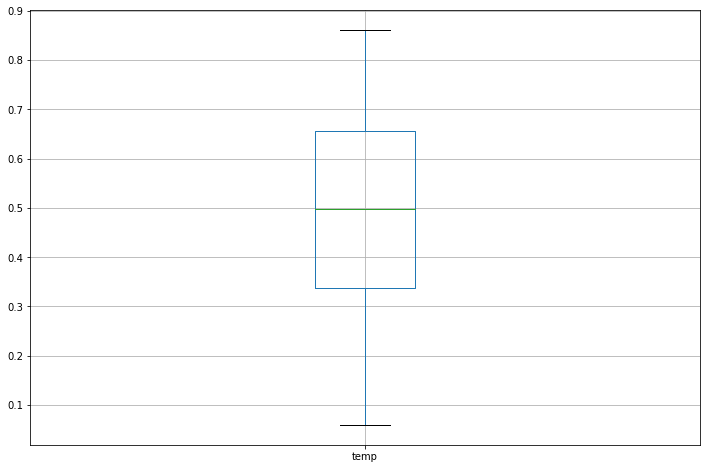

In [37]:
bike_sharing_data[['temp']].boxplot(figsize=(12, 8))

In [38]:
bike_sharing_data['temp_category'] = \
    bike_sharing_data['temp'] > bike_sharing_data['temp'].mean()

In [39]:
bike_sharing_data.sample(10)

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
63,1,3,0,0,2,0.384167,2077,False
339,4,12,0,1,3,0.462500,2594,False
259,3,9,0,0,2,0.491667,4511,False
319,4,11,0,1,3,0.456667,1817,False
489,2,5,0,1,1,0.627500,6296,True
225,3,8,0,0,2,0.676667,3820,True
52,1,2,0,1,1,0.182222,1450,False
80,2,3,0,1,1,0.441667,2703,False
441,1,3,0,0,2,0.514167,7836,True
434,1,3,0,0,1,0.287500,4118,False


In [40]:
bike_sharing_data.groupby('temp_category')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


<AxesSubplot:title={'center':'cnt'}, xlabel='temp_category'>

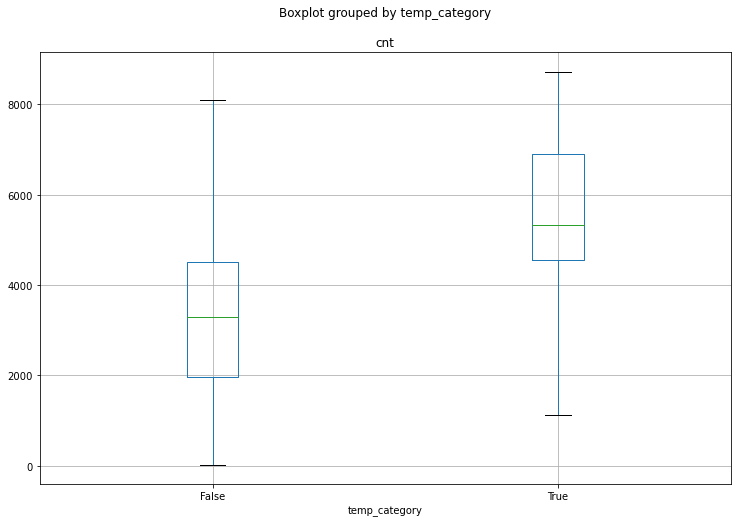

In [41]:
bike_sharing_data.boxplot(column=['cnt'], by='temp_category', figsize=(12, 8))

In [42]:
sample_01 = bike_sharing_data[(bike_sharing_data['temp_category'] == True)]

sample_02 = bike_sharing_data[(bike_sharing_data['temp_category'] == False)]

In [43]:
sample_01.shape, sample_02.shape

((367, 8), (364, 8))

In [44]:
sample_01 = sample_01.sample(364)

sample_01.shape, sample_02.shape

((364, 8), (364, 8))

In [45]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=4.542887586227349, pvalue=0.033391034052790536)

(array([ 3., 11., 27., 45., 71., 75., 51., 47., 23., 11.]),
 array([-2.80142684, -2.27919206, -1.75695727, -1.23472248, -0.7124877 ,
        -0.19025291,  0.33198188,  0.85421666,  1.37645145,  1.89868623,
         2.42092102]),
 <BarContainer object of 10 artists>)

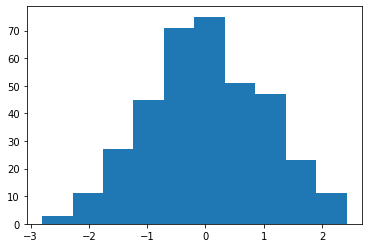

In [46]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt']))
plt.hist(diff)

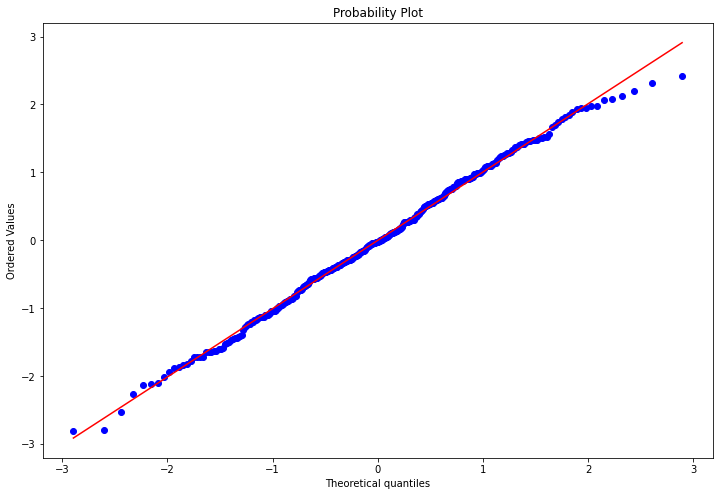

In [47]:
plt.figure(figsize=(12, 8))
stats.probplot(diff, plot=plt)
plt.show()

In [48]:
stats.shapiro(diff)

ShapiroResult(statistic=0.9958621859550476, pvalue=0.45665252208709717)

In [49]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=18.882851790239723, pvalue=5.30757442656968e-65)

In [50]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'], equal_variances=False)

In [51]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,364.0,5611.211538,1478.737296,77.506894,5458.792631,5763.630446
1,cnt,364.0,3387.664835,1691.340133,88.650311,3213.332169,3561.997501
2,combined,728.0,4499.438187,1938.534647,71.846874,4358.386074,4640.490300


In [52]:
print(results)

              Welch's t-test    results
0  Difference (cnt - cnt) =   2223.5467
1      Degrees of freedom =    715.2118
2                       t =     18.8829
3   Two side test p value =      0.0000
4  Difference < 0 p value =      1.0000
5  Difference > 0 p value =      0.0000
6               Cohen's d =      1.3997
7               Hedge's g =      1.3982
8           Glass's delta =      1.5037
9             Pearson's r =      0.5768
